# SALES PREDICTION USING PYTHON

## Importation

### Libraries

In [62]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [9]:
data = pd.read_csv('advertising.xls')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [8]:
data.duplicated().sum()

0

It seems our dataset is pretty clean already, I do not see anything that should be fixed so we are already done in data cleaning

## Data Analysis

In [10]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
data.shape

(200, 4)

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Describe Observations**

---

*   **Highest Average Expense** - The TV advertising channel has the highest average expense among the three channels (TV, Radio, Newspaper).
*   **Lowest Average Expense** - The Radio advertising channel has the lowest average expense among the three channels.

<br>

**Reasoning**

---

data.describe() shows the average spending for each channel. TV has the highest average, followed by Newspaper, then Radio. This matches the following histograms' patterns below, where TV expenses cluster around a higher average while Radio and Newspaper are more spread out with lower peaks.


## Data Visualization

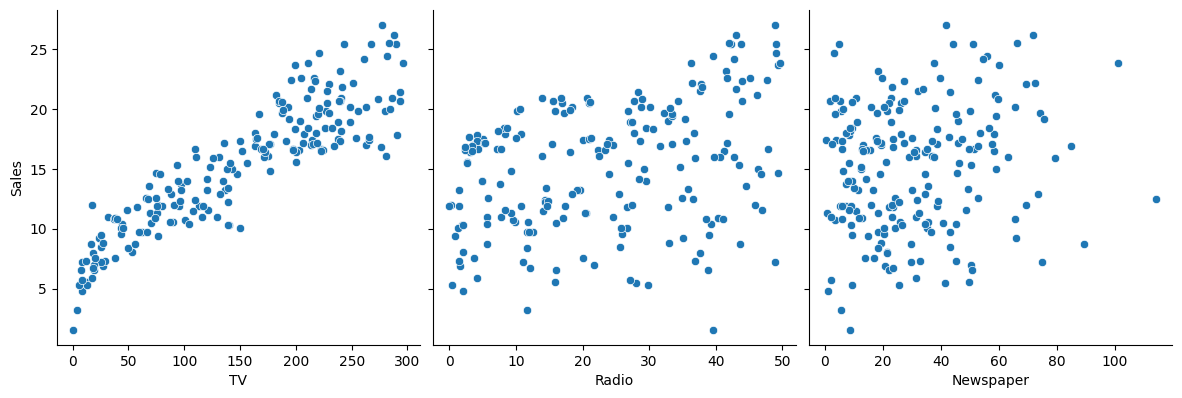

In [12]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

**Pair Plot Observation:**

---

Increasing advertising costs for TVs result in increased sales. Radio and Newspaper advertising show a weaker, less predictable relationship with sales.

<br>

**Reasoning:**

---

TV advertising has a broad reach and visual impact, leading to a stronger correlation with sales. Radio and Newspaper may have fragmented audiences, be less engaging, and face more competition, resulting in a weaker link to sales.

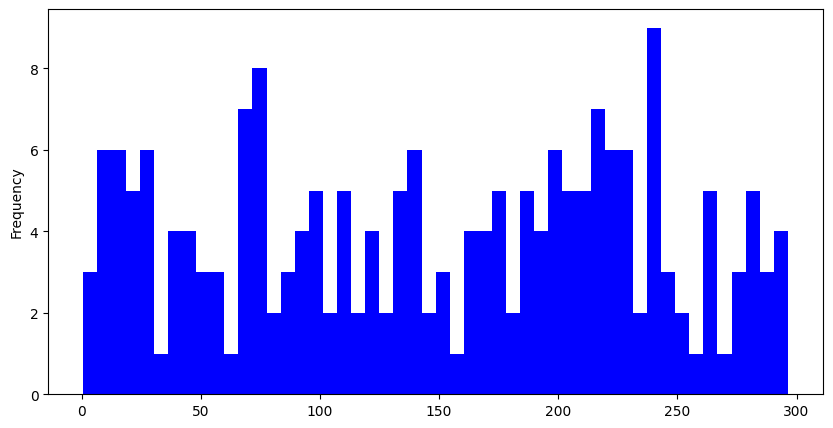

In [14]:
data['TV'].plot.hist(bins=50, color="blue", figsize=(10, 5))
plt.show()

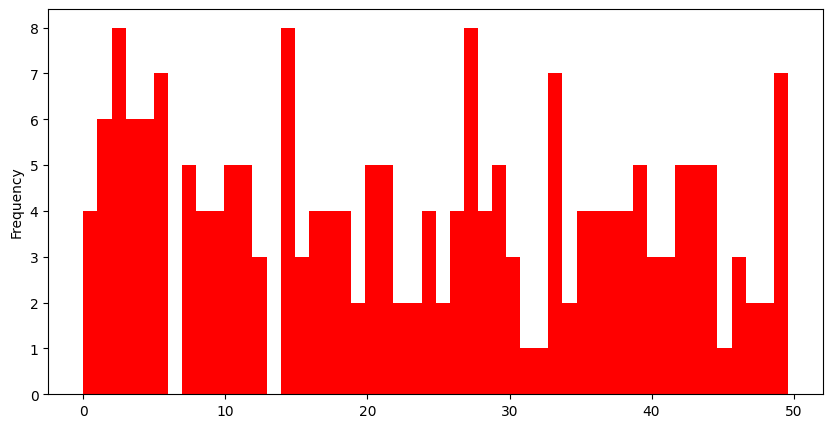

In [15]:
data['Radio'].plot.hist(bins=50, color="red", figsize=(10, 5))
plt.show()

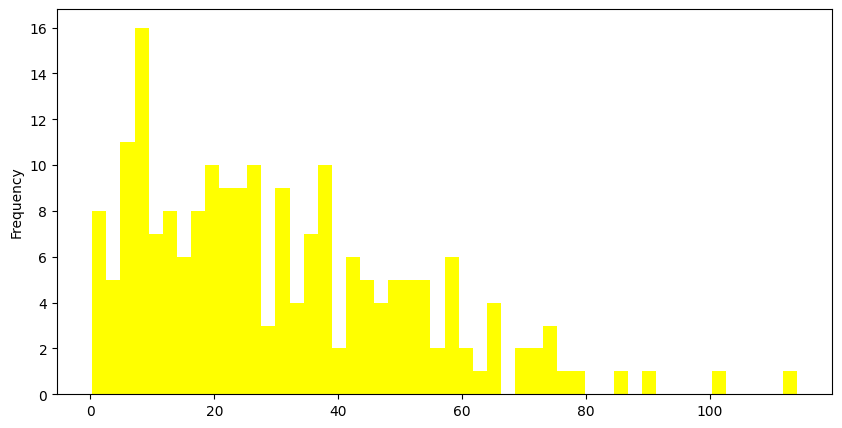

In [16]:
data['Newspaper'].plot.hist(bins=50, color="yellow", figsize=(10, 5))
plt.show()

**Histogram Observation:**

---

Advertising expenses are not equally distributed across TV, Radio, and Newspaper. TV has the highest average expense, followed by Radio and then Newspaper.

<br>

**Reasoning:**

---

The histograms show different shapes and peaks for each medium, indicating varying spending patterns. TV's histogram is more concentrated around a higher average, while Radio and Newspaper are more spread out with lower peaks. This suggests that more money is typically allocated to TV advertising compared to the other two mediums.

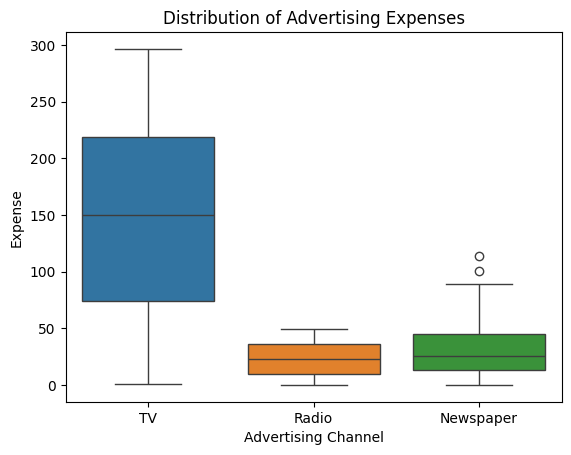

In [17]:
sns.boxplot(data=data[['TV', 'Radio', 'Newspaper']])

plt.xlabel("Advertising Channel")
plt.ylabel("Expense")
plt.title("Distribution of Advertising Expenses")

plt.show()

**Observations:**

---

    
*   TV has the highest median expense and widest range
*   Newspaper has the lowest median expense.
*   Radio and Newspaper have similar interquartile ranges.
*   Newspaper has potential outliers.

<br>

**Reasoning:**

---

*   Higher TV expense is likely due to higher production costs and broader reach.
*   Lower Newspaper expense could be due to lower production costs and smaller target audiences.
*   Similar IQR for Radio and Newspaper suggests similar spending patterns for the middle 50% of the data.
*   Newspaper outliers might represent specific campaigns or targeted investments.


**Final Observation**

---

Sales are **highly correlated** with **TV** advertising, **moderately correlated** with **Radio** advertising, and **weakly correlated** with **Newspaper** advertising

## Machine Learning

### Model Training

In [36]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
print(X_train)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]


In [23]:
print(y_train)

     Sales
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[160 rows x 1 columns]


In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
res = model.predict(X_test)

### Model Prediction

In [32]:
print(res)

[[10.92912965]
 [ 9.88399105]
 [12.08313684]
 [22.93189318]
 [16.42699412]
 [10.22148373]
 [ 7.63585439]
 [20.23195181]
 [ 8.45781235]
 [17.91849399]
 [21.38595901]
 [11.90894708]
 [15.68668762]
 [17.38503783]
 [11.32105662]
 [13.70527904]
 [21.62002651]
 [ 7.20037998]
 [11.22851831]
 [18.77855596]
 [22.81758114]
 [14.7994085 ]
 [16.6937222 ]
 [14.33127351]
 [10.07451111]
 [13.86313851]
 [16.17659633]
 [18.32130782]
 [19.35555956]
 [ 8.52857694]
 [10.85292163]
 [17.98925858]
 [22.44198446]
 [20.3190467 ]
 [ 7.88080875]
 [ 8.18019741]
 [10.40656035]
 [17.00399772]
 [10.88558221]
 [ 8.52313351]]


In [33]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2


res is similar but not exactly the same but good enough

In [34]:
TV_spend = 150  # Replace with the desired TV advertising spend

predicted_sales = model.predict([[TV_spend]])

print(f"Predicted Sales for TV Spend of {TV_spend}: {predicted_sales[0][0]}")

Predicted Sales for TV Spend of 150: 15.327421227418252


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Model Testing

In [61]:
mse = mean_squared_error(y_test, res)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, res)
print(f"R-squared (R2): {r2}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores.mean())
print(f"Cross-validated RMSE: {rmse_cv}")

Mean Squared Error (MSE): 4.522552562041291
R-squared (R2): 0.8645053923967724
Root Mean Squared Error (RMSE): 2.1266293899128947
Cross-validated RMSE: 1.6906339077372752


**Testing Explanations**

---

**Mean Squared Error (MSE)** - An MSE of 4.52 means my model's predictions are off by an average squared difference of 4.52.

**R-squared (R2)** - An R-squared of 0.86 means my model explains 86% of the variation in sales.

**Root Mean Squared Error (RMSE)** - An RMSE of 2.13 means my model's predictions are, on average, off by 2.13 units of sales.

**Cross-validated RMSE** - 1.69 This means my model's predictions are, on average, off by about 1.69 units of sales when tested on different parts of the data. This is a more reliable estimate of how well my model will perform on new, unseen data and it's lower than the standard RMSE, indicating good generalization.


**Conclusion**

---

This project aimed to develop a model for predicting sales based on advertising spending across different channels (TV, radio, and newspaper). The analysis revealed a positive correlation between TV advertising spend and sales, allowing the model to accurately predict sales trends based on TV advertising investments.

<br>

Furthermore, the model demonstrates good overall accuracy and reliability, with an R-squared value of 0.86, indicating that it explains a significant portion of the variance in sales. Evaluation metrics, such as RMSE (2.13) and cross-validated RMSE (1.69), further support the model's accuracy and its ability to generalize to new, unseen data.

<br>

These findings suggest that the model is a valuable tool for businesses looking to optimize their advertising strategies and forecast sales outcomes. While the current model performs well, there is always room for improvement. Future work could explore incorporating additional variables or refining the model further to enhance its predictive capabilities.

**The model accurately predicts sales based on advertising, especially TV, with high reliability**